# 데이터 만들기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)


time = np.arange(0, 10, 0.001)

sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

sin_sum = sin1 + sin2 + sin3

sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

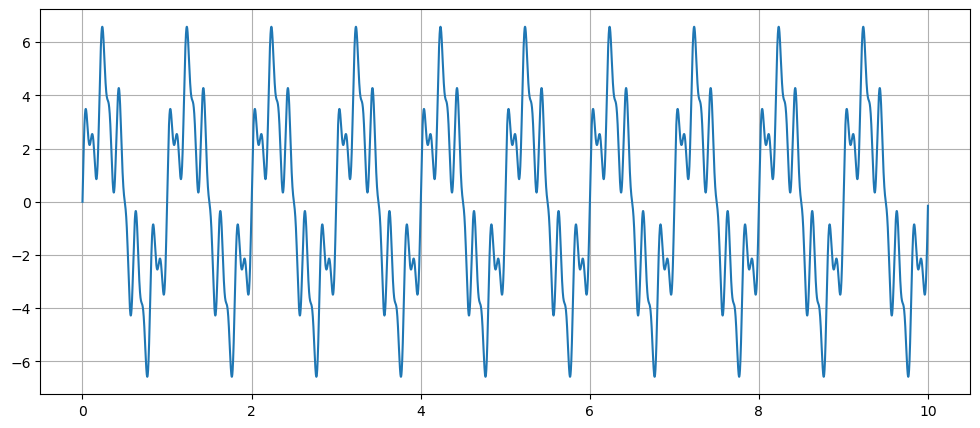

In [3]:
plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

---

# FFT

In [4]:
n = len(sin_sum) 
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]

Y = np.fft.fft(sin_sum)/n 
Y = Y[range(int(n/2))]

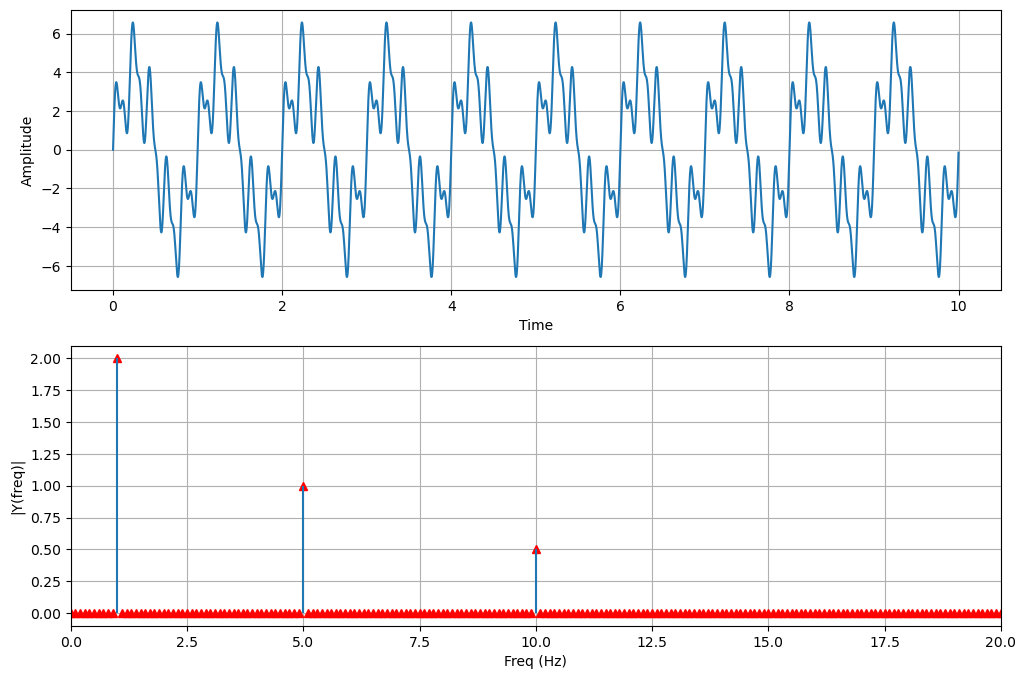

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

---

# STFT

In [6]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()
    
def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

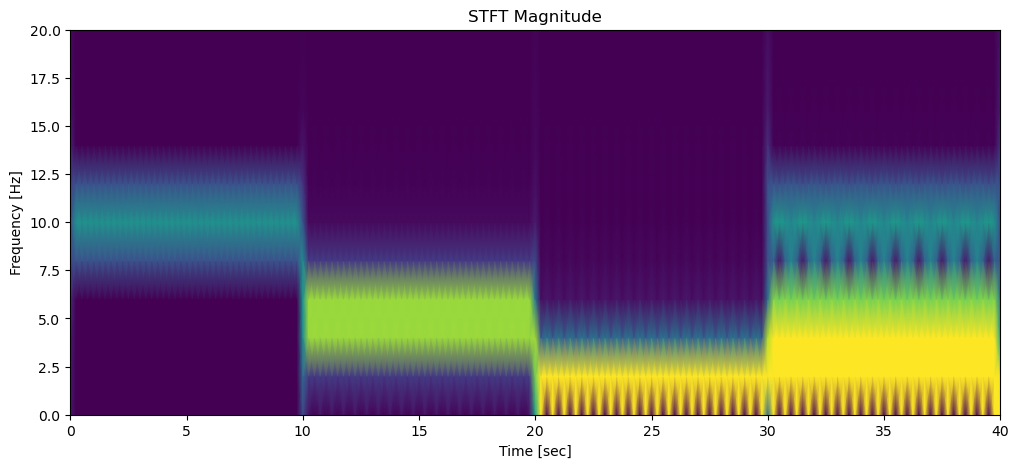

In [7]:
# window lenght : 500
calc_stft(500)

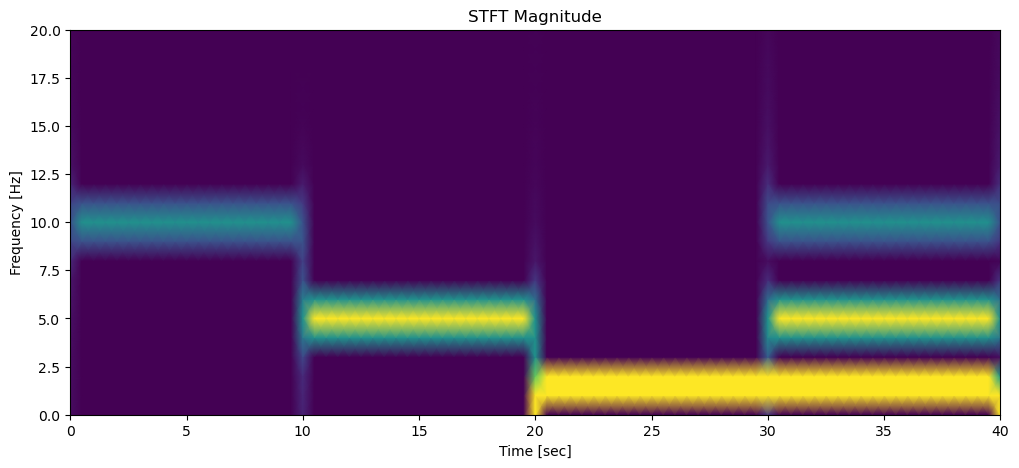

In [8]:
# window lenght : 1000
calc_stft(1000)

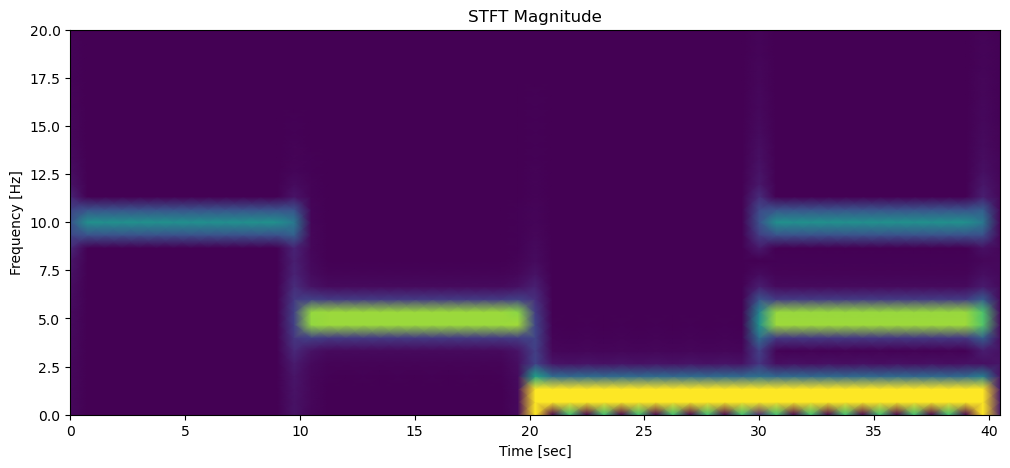

In [10]:
# window lenght : 1500
calc_stft(1500)